# Natural Language Processing Project

Dataset: [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.
<h3> Goal </h3>

To predict the star rating given the review.

## Imports
 **Import the usual suspects. :) **

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as matplot
import seaborn as sns

%matplotlib inline
sns.set(style = 'darkgrid', palette = 'muted')

## The Data

In [ ]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [ ]:
yelp.head()

In [ ]:
yelp.info()

In [ ]:
yelp.describe()

**Create a new column called "text length" which is the number of words in the text column.**

In [32]:
yelp['text_length'] = yelp['text'].apply(len)

# EDA

Let's explore the data

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/p

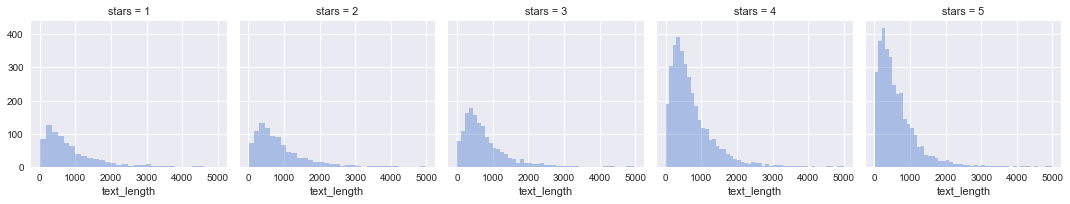

In [33]:
facet_grid = sns.FacetGrid(data = yelp, col = 'stars', palette = 'muted')
facet_grid.map(sns.distplot, 'text_length', kde = False)

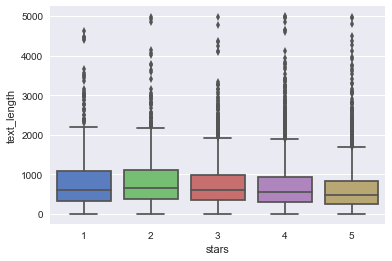

In [34]:
sns.boxplot(x = 'stars', y = 'text_length', data = yelp, palette = 'muted')

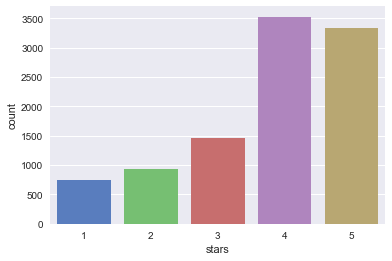

In [35]:
sns.countplot(x = 'stars', data = yelp)

In [36]:
inc_cols = 'stars cool useful funny text_length'.split()
inc_cols

['stars', 'cool', 'useful', 'funny', 'text_length']

In [37]:
grpby_stars = yelp[inc_cols].groupby(by = 'stars')
grpby_stars_mean_df = pd.DataFrame(data = grpby_stars.mean(), columns = inc_cols[1: ])
grpby_stars_mean_df

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [38]:
grpby_stars_mean_df.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


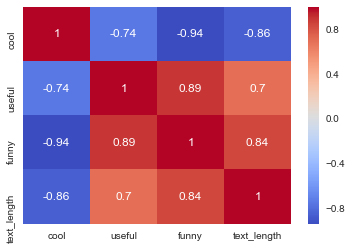

In [39]:
sns.heatmap(data = grpby_stars_mean_df.corr(), cmap = 'coolwarm', annot = True)

## NLP Classification

<b> Analyzing reviews with 1 and 5 star rating </b>

In [ ]:
df = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text_length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [42]:
X = df['text']
y = df['stars']

<b> Custom Analyzer to remove the punctuations, stopwords

In [43]:
import nltk

In [44]:
#download stopwords corpus
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def text_preprocessor(item):
    """
        Method removes the punctuation marks and stopwords from item string.
        Returns list of meaningful words from item string.
    """
    no_punctuation = [char for char in item if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word not in stopwords.words('english')]

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(analyzer = text_preprocessor)
bow_tranformer = count_vectorizer.fit(X)

In [ ]:
bow_tranformer.vocabulary_

In [ ]:
reviews_bow = bow_tranformer.transform(X)

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [ ]:
sparsity = 100 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])
print('Sparsity of Bag of Words matrix is {}%'.format(round(sparsity, 2)))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()

In [ ]:
tfidf_transformer.fit(reviews_bow)

In [ ]:
reviews_bow_tfidf = tfidf_transformer.transform(reviews_bow)

## Training a Model

Time to train a model!

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()

## Pipeline


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_preprocessor)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

## Train Test Split

Let's split our data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
pipeline.fit(X = X_train, y = y_train)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [ ]:
predictions = pipeline.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print('------------- Confusion Matrix -------------\n\t')
print(confusion_matrix(y_true = y_test, y_pred = predictions))
print('\n')
print('------------- Classification Report -------------\n\t')
print(classification_report(y_true = y_test, y_pred = predictions))

<h2> Without cleaning the reviews <h2>

In [ ]:
new_X = df['text']
new_y = df['stars']

In [ ]:
new_X = CountVectorizer().fit_transform(new_X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y,test_size=0.3,random_state=100)

In [ ]:
naive_bayes_model.fit(X_train, y_train)

In [ ]:
new_predictions = naive_bayes_model.predict(X_test)

In [ ]:
print('------------- Confusion Matrix -------------\n\t')
print(confusion_matrix(y_true = y_test, y_pred = new_predictions))
print('\n')
print('------------- Classification Report -------------\n\t')
print(classification_report(y_true = y_test, y_pred = new_predictions))

<b> Model performed better with uncleaned reviews </b>